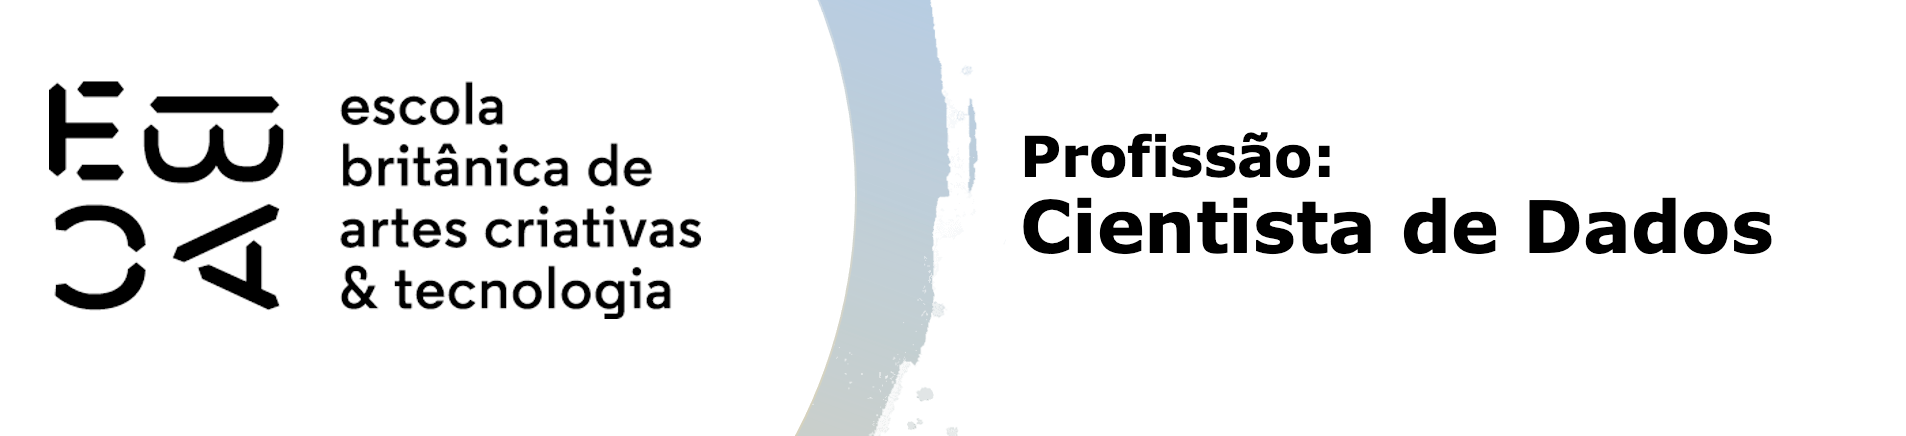

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from gower import gower_matrix
from scipy.spatial.distance  import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [2]:
df = pd.read_csv('./input/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Revenue
False    10422
True      1908
Name: count, dtype: int64

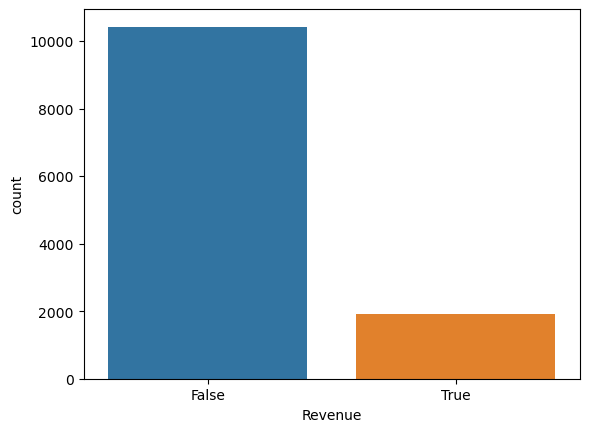

In [4]:
display(df.Revenue.value_counts(dropna=False))

sns.countplot(x='Revenue', data=df)
plt.show()

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

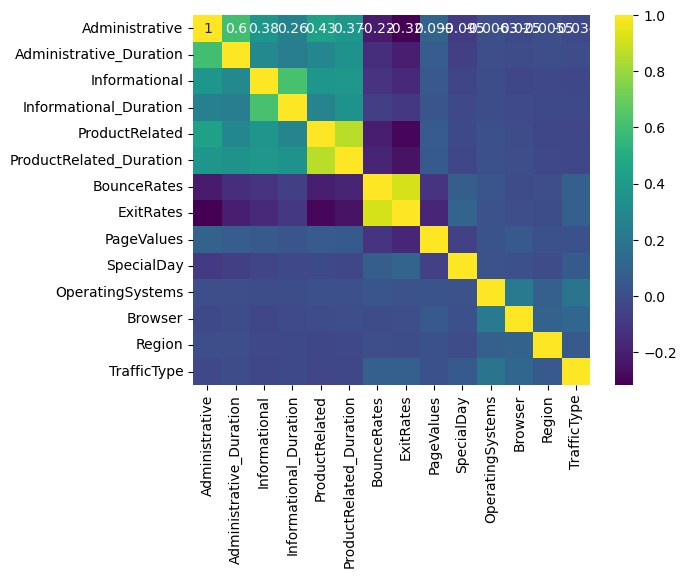

In [8]:
num_df = df.select_dtypes(include='number')
sns.heatmap(num_df.corr(), cmap='viridis', annot=True)
plt.show

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [9]:
var_agrup = ['Administrative', 
                              'Informational', 
                              'ProductRelated', 
                              'PageValues', 
                              'OperatingSystems', 
                              'Browser', 
                              'TrafficType', 
                              'VisitorType']


(df[var_agrup].dtypes.reset_index().rename(columns={'index': 'Variável (variaveis de agrupamento)', 0: 'Tipo'}))

,Variável (variaveis de agrupamento),Tipo
0,Administrative,int64
1,Informational,int64
2,ProductRelated,int64
3,PageValues,float64
4,OperatingSystems,int64
5,Browser,int64
6,TrafficType,int64
7,VisitorType,object


In [10]:
var_data = ['SpecialDay', 'Month', 'Weekend']
(df[var_data].dtypes.reset_index().rename(columns={'index': 'Variável (variaveis data)', 0: 'Tipo'}))

,Variável (variaveis data),Tipo
0,SpecialDay,float64
1,Month,object
2,Weekend,bool


In [11]:
var_num = ['ProductRelated', 'PageValues', 'SpecialDay']

df_ = df[var_agrup + var_data]

df_cat = df_.drop(columns=var_num)

print('Variáveis Categóricas e seus Valores Únicos:')
[f'{cat}: {df[cat].unique()}' for cat in df_cat]

Variáveis Categóricas e seus Valores Únicos:


['Administrative: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20\n 23 27 26]',
 'Informational: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]',
 'OperatingSystems: [1 2 4 3 7 6 8 5]',
 'Browser: [ 1  2  3  4  5  6  7 10  8  9 12 13 11]',
 'TrafficType: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]',
 "VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']",
 "Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']",
 'Weekend: [False  True]']

In [12]:
df_dummies = pd.get_dummies(data=df_, drop_first=False)

categ = df_dummies.drop(columns=var_num).columns.values

caract_categ = [True if column in categ else False for column in df_dummies]

(df_dummies
 .dtypes
 .reset_index()
 .rename(columns={'index': 'Variável', 0: 'Tipo'}).assign(Categorical=caract_categ))

,Variável,Tipo,Categorical
0,Administrative,int64,True
1,Informational,int64,True
2,ProductRelated,int64,False
3,PageValues,float64,False
4,OperatingSystems,int64,True
5,Browser,int64,True
6,TrafficType,int64,True
7,SpecialDay,float64,False
8,Weekend,bool,True
9,VisitorType_New_Visitor,bool,True


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [13]:
%%time

dist_gower = gower_matrix(data_x=df_dummies, cat_features=caract_categ)

pd.DataFrame(dist_gower)

CPU times: total: 2min 47s
Wall time: 2min 49s


,0,1,2,3,4,5,6,7,8,9,...,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329
0,0.000000,0.136428,0.090909,0.136428,0.182398,0.137524,0.154545,0.181883,0.172792,0.154674,...,0.182269,0.136686,0.274081,0.275500,0.228240,0.277618,0.272985,0.273050,0.273630,0.363765
1,0.136428,0.000000,0.136428,0.090909,0.182334,0.046551,0.109155,0.181947,0.081818,0.063701,...,0.136750,0.227531,0.137653,0.184526,0.182721,0.323008,0.227466,0.227531,0.182656,0.272792
2,0.090909,0.136428,0.000000,0.136428,0.182398,0.092070,0.109091,0.227337,0.127337,0.154674,...,0.227724,0.227595,0.274081,0.275500,0.273694,0.277618,0.272985,0.273050,0.273630,0.363765
3,0.136428,0.090909,0.136428,0.000000,0.091425,0.092005,0.154610,0.181947,0.127273,0.154610,...,0.182205,0.227531,0.228562,0.229981,0.228175,0.323008,0.182012,0.182076,0.228111,0.272792
4,0.182398,0.182334,0.182398,0.091425,0.000000,0.182398,0.200580,0.182463,0.218698,0.200451,...,0.272856,0.272985,0.318956,0.320374,0.318569,0.277038,0.182141,0.182076,0.318504,0.273179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.277618,0.323008,0.277618,0.323008,0.277038,0.321912,0.341254,0.277683,0.359372,0.341125,...,0.277167,0.277296,0.230810,0.320300,0.322105,0.000000,0.277360,0.277296,0.322170,0.368398
12326,0.272985,0.227466,0.272985,0.182012,0.182141,0.228175,0.291167,0.227595,0.263830,0.291038,...,0.136557,0.181883,0.273823,0.184333,0.182527,0.277360,0.000000,0.045519,0.182463,0.136493
12327,0.273050,0.227531,0.273050,0.182076,0.182076,0.228111,0.291231,0.227660,0.263894,0.291103,...,0.136493,0.181818,0.273759,0.184268,0.182463,0.277296,0.045519,0.000000,0.182398,0.136557
12328,0.273630,0.182656,0.273630,0.228111,0.318504,0.182076,0.246357,0.273694,0.219020,0.246228,...,0.091360,0.182398,0.182269,0.092779,0.136428,0.322170,0.182463,0.182398,0.000000,0.273501


In [14]:
%%time

gdv = squareform(X=dist_gower, force='tovector')

Z = linkage(y=gdv, method='complete')

pd.DataFrame(data=Z, columns=['id1', 'id2', 'dist', 'n'])

CPU times: total: 5.52 s
Wall time: 5.51 s


,id1,id2,dist,n
0,166.0,167.0,0.000000,2.0
1,64.0,140.0,0.000000,2.0
2,143.0,12331.0,0.000000,3.0
3,10.0,87.0,0.000000,2.0
4,60.0,163.0,0.000000,2.0
...,...,...,...,...
12324,24650.0,24653.0,0.454280,6666.0
12325,24632.0,24636.0,0.481065,1415.0
12326,24637.0,24654.0,0.506725,9222.0
12327,24652.0,24655.0,0.547158,3108.0



3 grupos:
dendrogram.icoord: 117
dendrogram.dcoord: 117
dendrogram.ivl: 118
dendrogram.leaves: 118
dendrogram.color_list: 117
dendrogram.leaves_color_list: 118

4 grupos:
dendrogram.icoord: 117
dendrogram.dcoord: 117
dendrogram.ivl: 118
dendrogram.leaves: 118
dendrogram.color_list: 117
dendrogram.leaves_color_list: 118


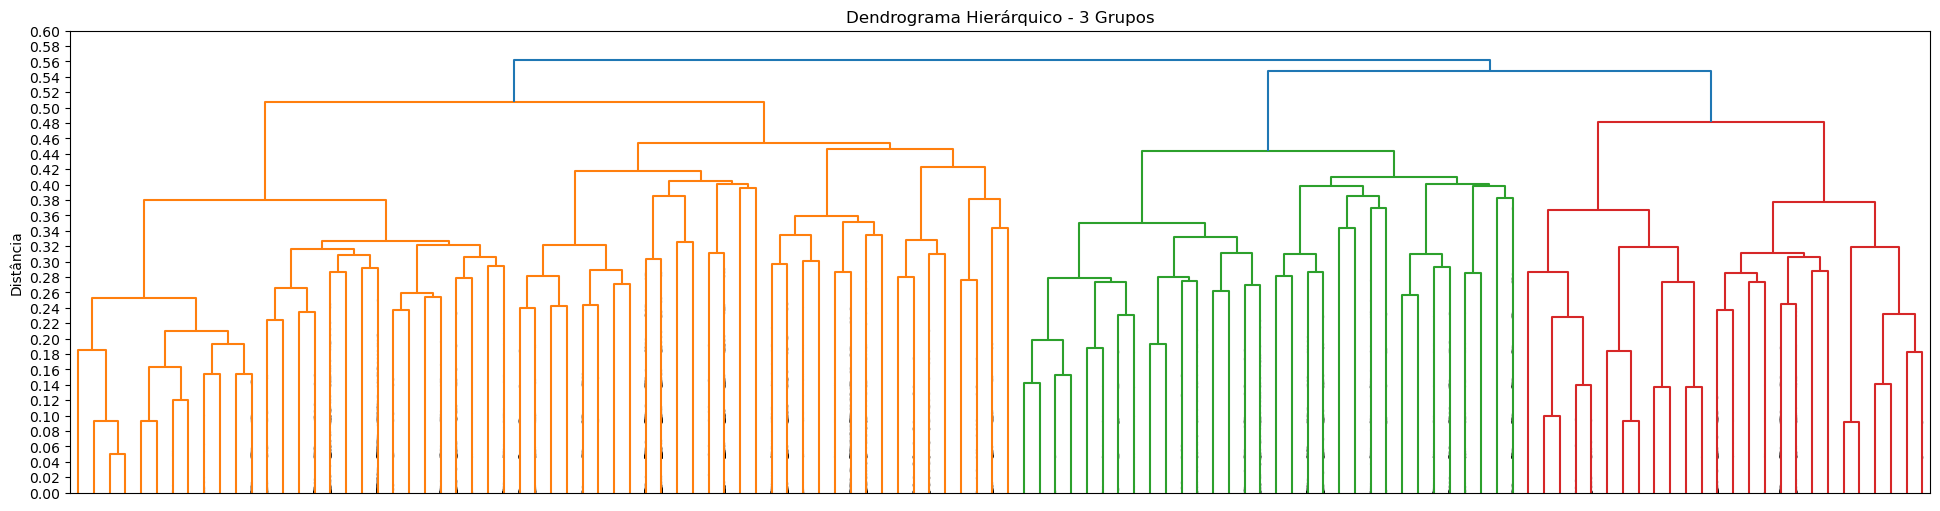

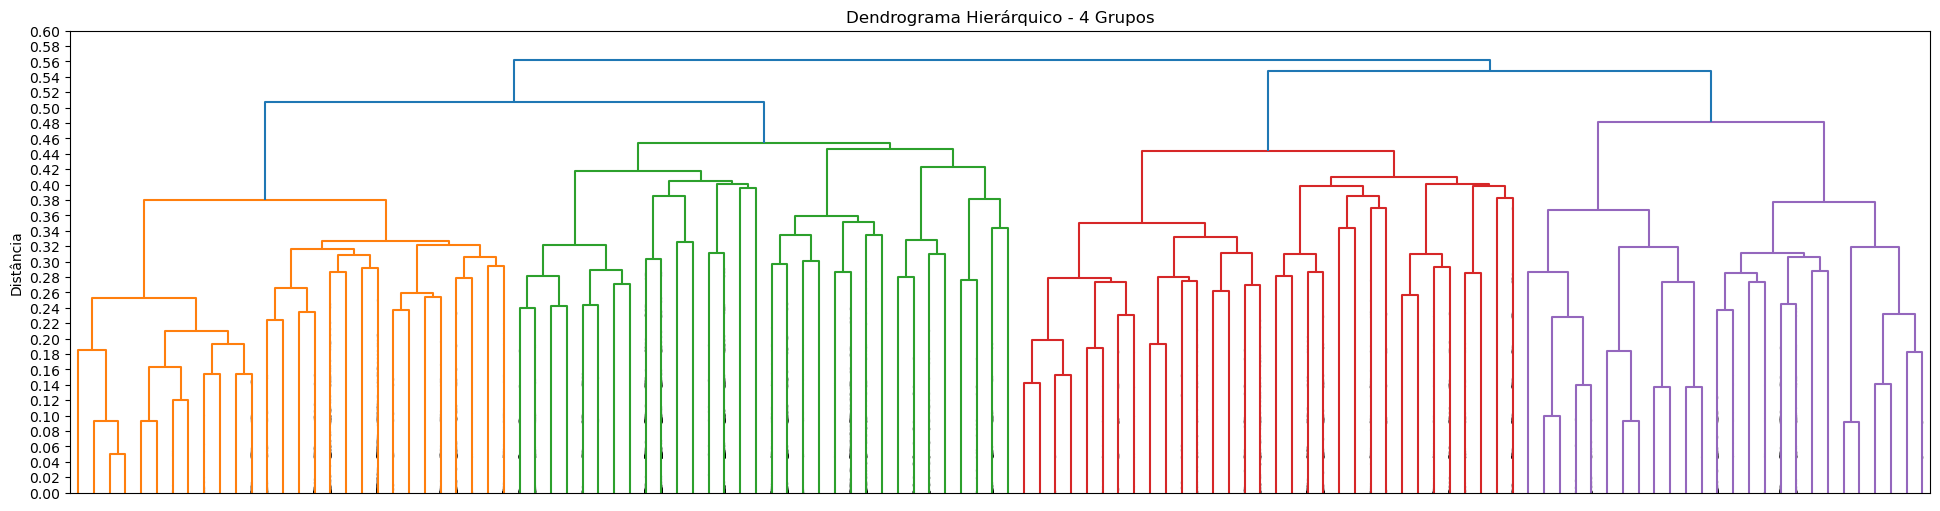

CPU times: total: 8.75 s
Wall time: 8.75 s


In [15]:
%%time

def dn(color_threshold: float, num_groups: int) -> None:
    plt.figure(figsize=(24, 6))
    plt.ylabel(ylabel='Distância')
    
    plt.title(f'Dendrograma Hierárquico - {num_groups} Grupos')

    dn = dendrogram(Z=Z, 
                    p=6, 
                    truncate_mode='level', 
                    color_threshold=color_threshold, 
                    show_leaf_counts=True, 
                    leaf_font_size=8, 
                    leaf_rotation=45, 
                    show_contracted=True)
    plt.yticks(np.linspace(0, .6, num=31))
    plt.xticks([])

    for i in dn.keys():
        print(f'dendrogram.{i}: {len(dn[i])}')

for qtd, color_threshold in [(3, .53), (4, .5)]:
    print(f'\n{qtd} grupos:')
    dn(color_threshold, qtd)

plt.show()

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [16]:
df['grupo_3'] = fcluster(Z=Z, t=3, criterion='maxclust')

(pd.DataFrame({'Grupo': df.grupo_3.value_counts().index, 
               'Quantidade': df.grupo_3.value_counts().values})
 .set_index('Grupo')
)

,Quantidade
Grupo,
1,9222
2,1693
3,1415


In [17]:
(pd.crosstab(index=df.VisitorType, 
             columns=[df.grupo_3, df.Revenue], 
             normalize='index')
 .applymap(lambda x: f'{x*100:.0f} %'))

grupo_3               1           2           3      
Revenue           False True  False True  False True 
VisitorType                                          
New_Visitor         0 %   0 %  75 %  25 %   0 %   0 %
Other               0 %   1 %   0 %   0 %  81 %  18 %
Returning_Visitor  75 %  13 %   0 %   0 %  11 %   1 %

In [18]:
(pd.crosstab(index=df.Revenue, 
             columns=df.grupo_3, 
             normalize='index')
 .applymap(lambda x: f'{x*100:.2f} %')
 .rename(columns={1: '1 (Retorno_Visitante)', 
                  2: '2 (Novo_visitante)', 
                  3: '3 (Outro)'})
)

grupo_3,1 (Retorno_Visitante),2 (Novo_visitante),3 (Outro)
Revenue,,,
False,75.60 %,12.20 %,12.20 %
True,70.39 %,22.12 %,7.49 %


In [19]:
df['grupo_4'] = fcluster(Z=Z, t=4, criterion='maxclust')

(pd.DataFrame({'Grupo': df.grupo_4.value_counts().index, 
               'Quantidade': df.grupo_4.value_counts().values})
 .set_index('Grupo')
 .sort_index()
)

,Quantidade
Grupo,
1,2556
2,6666
3,1693
4,1415


In [20]:
(pd.crosstab(index=df.Month, 
             columns=[df.grupo_4, df.Revenue], 
             normalize='columns')
 .applymap(lambda x: f'{x*100:.2f} %')
)

grupo_4         1                  2                 3                 4  \
Revenue     False     True     False    True     False    True     False   
Month                                                                      
Aug        0.00 %    0.00 %   5.14 %   7.70 %   4.01 %   4.98 %   0.00 %   
Dec        0.00 %    0.00 %   0.00 %   0.00 %  20.38 %  17.77 %  98.43 %   
Feb        0.00 %    0.00 %   3.02 %   0.42 %   0.08 %   0.00 %   0.00 %   
Jul        0.00 %    0.00 %   5.43 %   7.70 %   3.38 %   2.61 %   0.00 %   
June       0.00 %    0.00 %   3.95 %   3.08 %   1.81 %   1.66 %   0.08 %   
Mar        0.00 %    0.00 %  25.52 %  21.85 %  15.42 %   8.53 %   0.00 %   
May        0.00 %    0.00 %  46.51 %  38.80 %  18.17 %  20.85 %   0.00 %   
Nov      100.00 %  100.00 %   0.02 %   0.14 %  22.90 %  30.33 %   1.49 %   
Oct        0.00 %    0.00 %   5.68 %  12.18 %   7.55 %   6.64 %   0.00 %   
Sep        0.00 %    0.00 %   4.74 %   8.12 %   6.29 %   6.64 %   0.00 %   

grupo_4           
Revenue    True   
Month             
Aug       0.00 %  
Dec      98.60 %  
Feb       0.00 %  
Jul       0.00 %  
June      0.00 %  
Mar       0.00 %  
May       0.00 %  
Nov       1.40 %  
Oct       0.00 %  
Sep       0.00 %

In [21]:
(pd.crosstab(index=[df.Revenue, df.VisitorType, df.SpecialDay], 
             columns=df.grupo_4, 
             normalize='index')
 .applymap(lambda x: f'{x*100:.2f} %')
 .rename(columns={1: '1 (Retorno_Visitante - SpecialDay 0)', 
                  2: '2 (Retorno_Visitante - SpecialDay 1)', 
                  3: '3 (Novo_visitante)', 
                  4: '4 (Outro)'})
)

grupo_4                              1 (Retorno_Visitante - SpecialDay 0)  \
Revenue VisitorType       SpecialDay                                        
False   New_Visitor       0.0                                      0.00 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
        Other             0.0                                      0.00 %   
        Returning_Visitor 0.0                                     24.24 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
True    New_Visitor       0.0                                      0.00 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
        Other             0.0                                      6.25 %   
        Returning_Visitor 0.0                                     44.57 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   

grupo_4                              2 (Retorno_Visitante - SpecialDay 1)  \
Revenue VisitorType       SpecialDay                                        
False   New_Visitor       0.0                                      0.00 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
        Other             0.0                                      0.00 %   
        Returning_Visitor 0.0                                     60.64 %   
                          0.2                                    100.00 %   
                          0.4                                    100.00 %   
                          0.6                                    100.00 %   
                          0.8                                    100.00 %   
                          1.0                                    100.00 %   
True    New_Visitor       0.0                                      0.00 %   
                          0.2                                      0.00 %   
                          0.4                                      0.00 %   
                          0.6                                      0.00 %   
                          0.8                                      0.00 %   
                          1.0                                      0.00 %   
        Other             0.0                                      0.00 %   
        Returning_Visitor 0.0                                     46.34 %   
                          0.2                                    100.00 

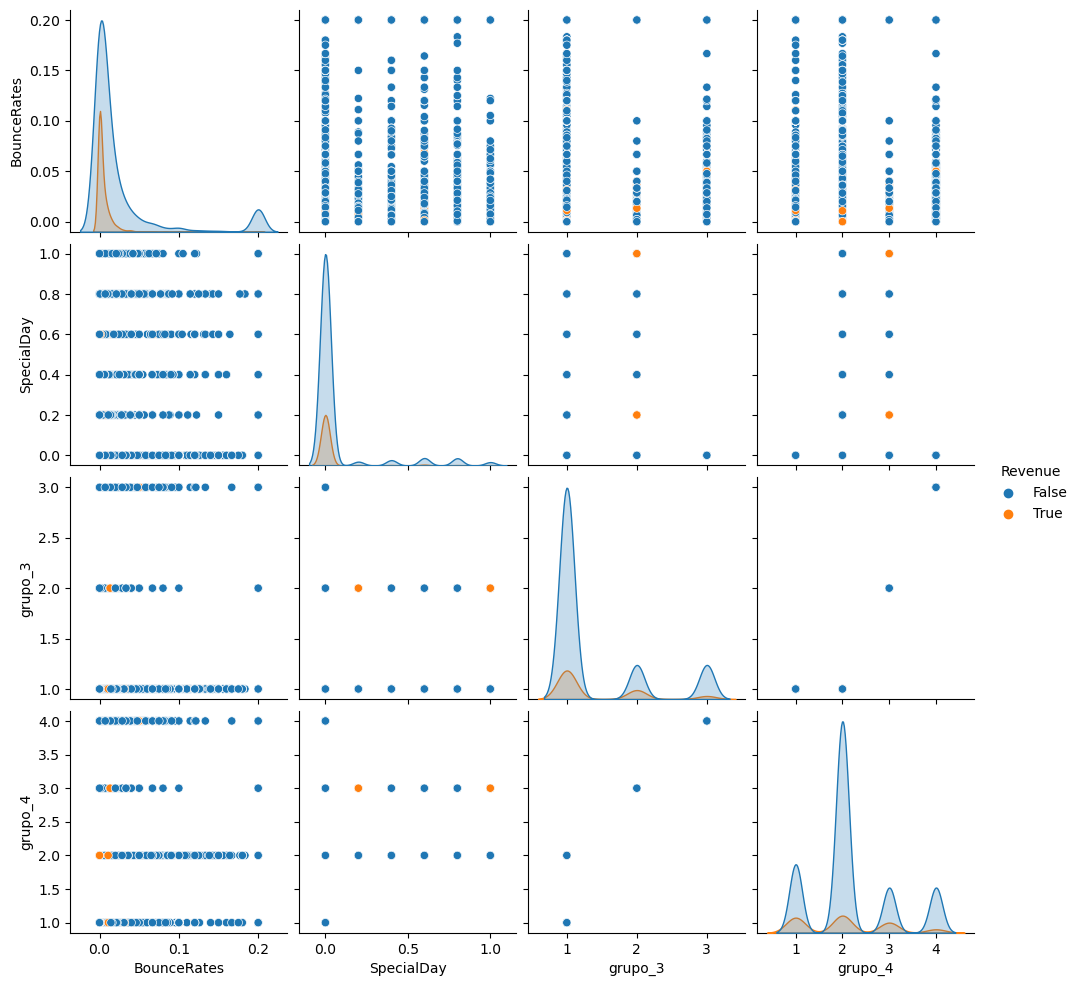

In [22]:
sns.pairplot(data=df[['BounceRates', 'Revenue', 'SpecialDay', 'grupo_3', 'grupo_4']], hue='Revenue')

plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

Na análise dos resultados do agrupamento hierárquico, destaca a relevância da abordagem centrada nas categorias de tipos de visitantes. Especificamente, ao agrupar em três categorias, o grupo 1 (Retorno_Visitante), composto por visitantes recorrentes, apresenta a maior propensão à realização de compras. Essa conclusão é sustentada pela análise das relações entre as variáveis de navegação e as características temporais, que resultaram na formação de categorias distintas para os visitantes. Esse insight proporciona uma visão valiosa sobre o comportamento dos visitantes, permitindo a implementação de estratégias direcionadas para diferentes segmentos. Dessa forma, é possível otimizar a experiência do usuário e a eficácia das estratégias de marketing.